#  *Decison Trees Lab 3: Breast Cancer Patient Survival Analysis*
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------


# Table of Contents  ssss
--------------------------------------------------------
1. [Introduction](#Introduction)
2. [Problem Statement](#Problem-Statement)
3. [Data Import and Exploration](#Data-Import-and-Exploration)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
    - [Visualizations](#Visualizations)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Feature Engineering](#Feature-Engineering)
7. [Modelling](#Modelling)
    - [Data Splitting](#Data-Splitting)
    - [Model Building](#Model-Building)
8. [Model Evaluation](#Model-Evaluation)
    - [Model Metrics](#Model-Metrics)
9. [Hyperparameter Tuning](#Hyperparameter-Tuning)
10. [Conclusion](#Conclusion)




# 1. Introduction

Breast cancer is one of the most common cancers affecting women globally. Early detection and diagnosis are crucial steps in effectively treating and possibly curing the disease. 

### Dataset Description:

The dataset contains the following features:

- Age: Age of the patient
- Race: Race of the patient
- Marital Status: Marital status of the patient
- T Stage, N Stage, 6th Stage: Staging information based on tumor size, lymph node involvement, and an overall stage grouping
- Differentiate: How much or how little the tumor tissue resembles normal tissue
- Grade: Grade of the tumor
-A Stage: Another stage classification
-Tumor Size: Size of the tumor in mm
-Estrogen Status, Progesterone Status: Hormone receptor status
-Regional Node Examined: Number of lymph nodes examined
-Regional Node Positive: Number of positive lymph nodes
-Survival Months: Number of months the patient survived post-diagnosis
-Status: Whether the patient is alive or dead

# 2. Problem Statement

This notebook aims to analyze a dataset containing various patient features and their breast cancer status, with the end goal of building a predictive decision tree model to assist in early diagnosis and to classify cancer patients as having survived or died based on their biometric data.

In [1]:
import sys
sys.executable

'C:\\Users\\matlo\\anaconda3\\python.exe'

# 3. Data Import and Exploration

In [2]:
#Read in libraries
import pandas  as pd #Data manipulation
import numpy as np  #Data manipulation
import matplotlib.pyplot as plt  #Visualization
import seaborn as sns  #Visualization
from pandas.plotting import scatter_matrix  #Visualization

from sklearn.preprocessing import MinMaxScaler  #Feature Normalisation

from sklearn.model_selection import train_test_split  #Model Training
from sklearn.tree import DecisionTreeRegressor  #Selected Model

#to visualize tree
from sklearn.tree import plot_tree
from io import StringIO 
from sklearn.tree import export_graphviz
#import pydotplus   
from IPython.display import Image  

 

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV  #hyperparameter tuning

%matplotlib inline

In [3]:
df = pd.read_csv(f"""Breast_Cancer.csv""")   

In [4]:
df.head()  #preview

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


# 4. Exploratory Data Analysis (EDA)

### Data Overview:

In [5]:
df.shape

(4024, 16)

There are 4 024 Rows and 16 Columns.

## data type

In [6]:
df.dtypes  #no conversion needed , everything is numeric , no strings

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

### Data Summary

In [7]:
#Displaying the statistical summary of the features
summary_cont =df.describe()
summary_cont

#Only the continuos variables will be displayed

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Summarise the categorical data to obtain any insight:

In [8]:
df.columns = df.columns.str.strip()  ##Remove any unseen leading/trailing spaces to avoid errors

## Summary for encoded categorical variables
print("\nSummary for encoded categorical variables:")
cat_data= df[['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']]

cat_data.describe()


Summary for encoded categorical variables:


,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,4,2,2,2,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3413,2643,1786,2732,1305,2351,2351,3932,3755,3326,3408


## <u>Visualizations</u>

## Univariate Analysis: Exploring Distribution

###                _Histograms and Bar Plots_

Create a visualization of the features to see how the data is distributed:

Use histogram for the <u>__continuous__</u> variables:

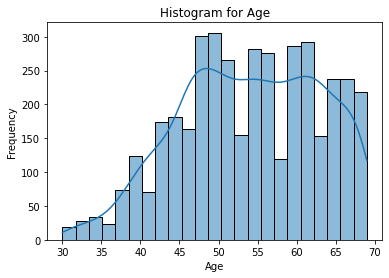

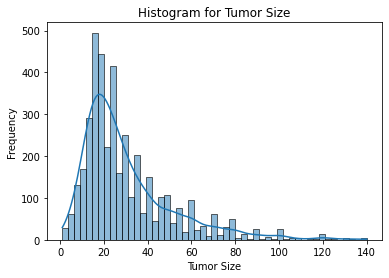

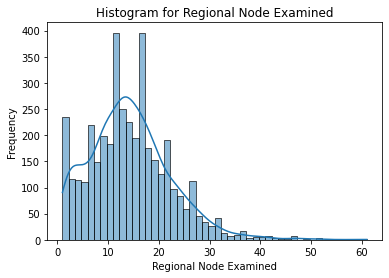

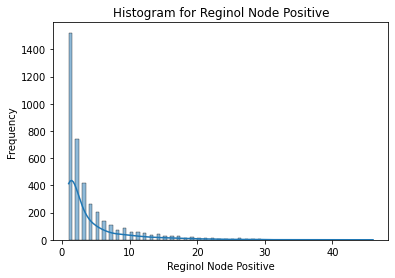

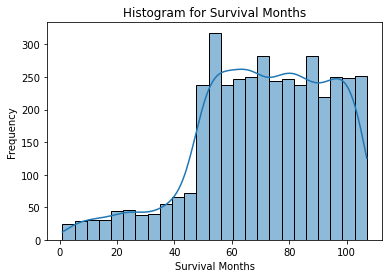

In [9]:
cont_features = df.drop(cat_data.columns, axis = 1)  # Exclude the 'Status' column

for cont_feature in cont_features:
    sns.histplot(df[cont_feature], kde=True)
    plt.title(f'Histogram for {cont_feature}')
    plt.xlabel(cont_feature)
    plt.ylabel('Frequency')
    plt.show()


**Note:**

- The Age and Survival Months display a relatively normal distribution while the Tumor size and Regional Node Examined 
take on a Poisson distribution. 
- The Reginol Node Positive displays an exponential distribution 

 Use bar graphs to explore the <u>__categorical data__</u>:

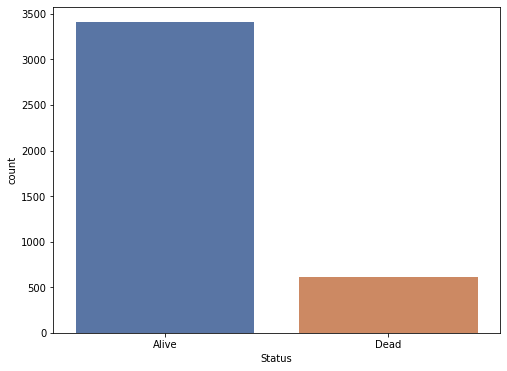

In [11]:
#Explore the status of survical among cancer patients:

plt.figure(figsize= (8,6))
sns.countplot(x='Status', data=df, palette='deep')
plt.show()

In [12]:
status_counts = df['Status'].value_counts()
status_counts

Alive    3408
Dead      616
Name: Status, dtype: int64

In [13]:
percentageAlive =  (len(df[df['Status'] == 'Alive']) / (len(df[df['Status'] == 'Alive']) + len(df[df['Status'] == 'Dead']))) * 100


In [14]:
print(f'Percentage Survival is:{percentageAlive}%')
print(f'Percentage Death is: {100 - percentageAlive}%')

Percentage Survival is:84.69184890656064%
Percentage Death is: 15.308151093439363%


- The balance in the target variable is highly imbalanced, with a significantly high number of survival (Alive) cases than those of death.

------------------------------------------------------------------------------------------------------------------

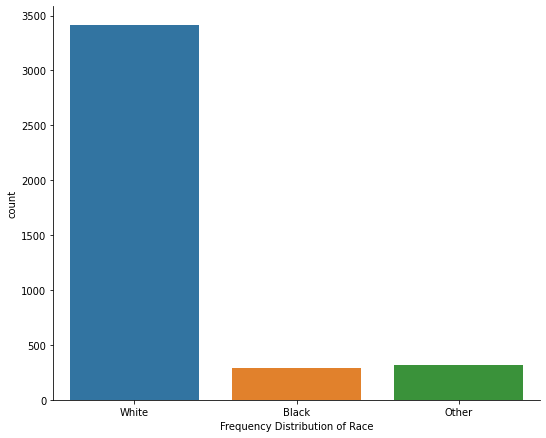

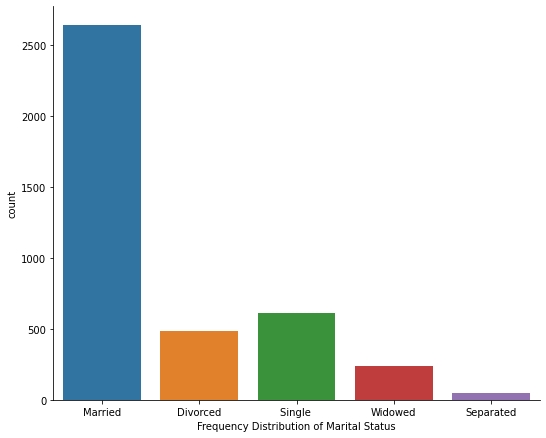

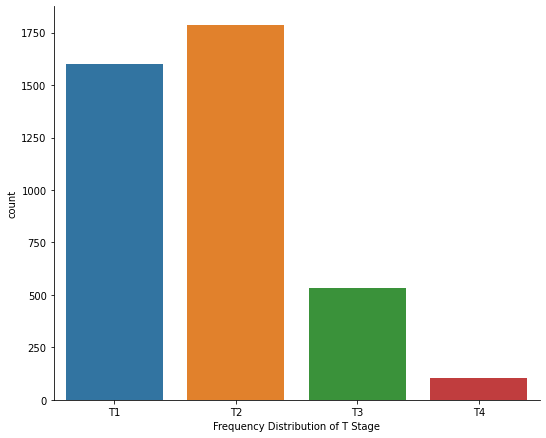

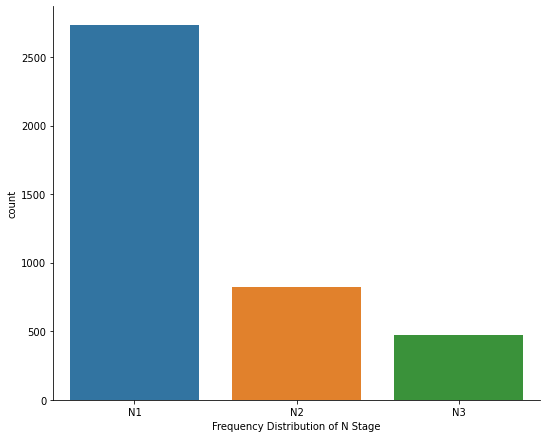

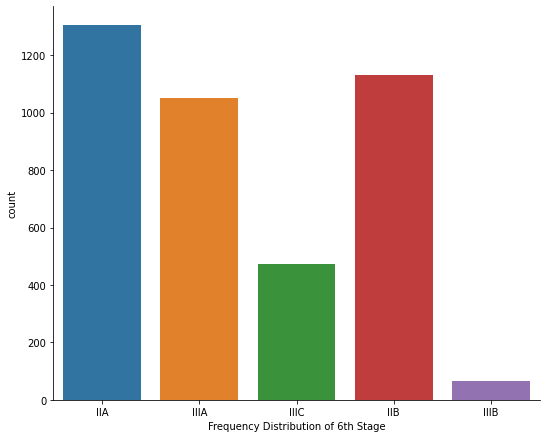

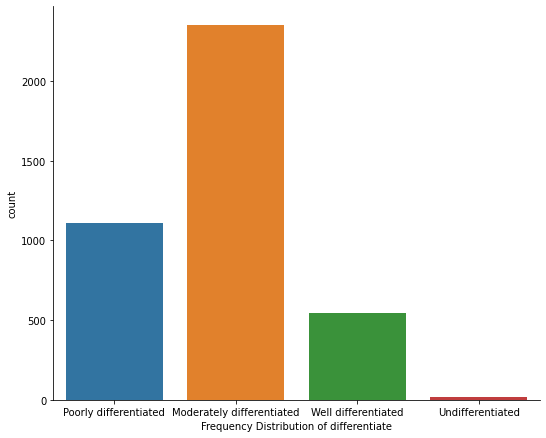

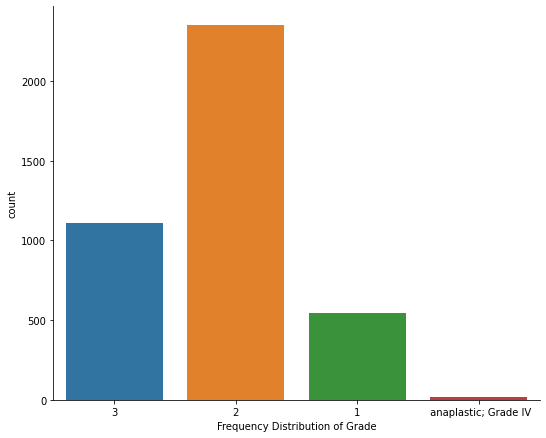

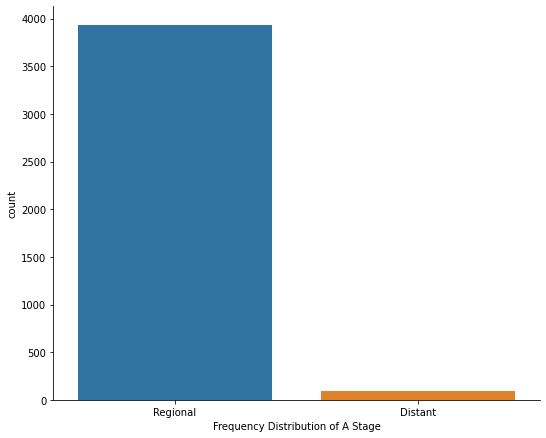

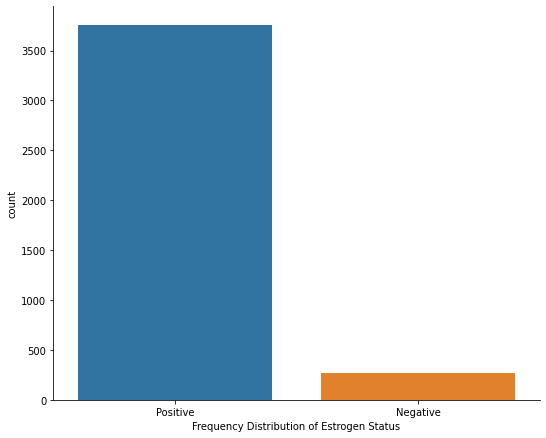

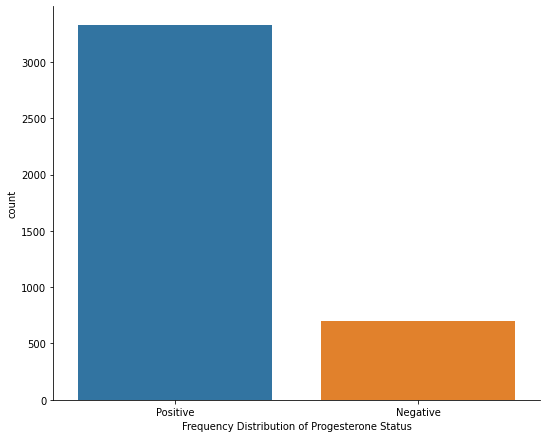

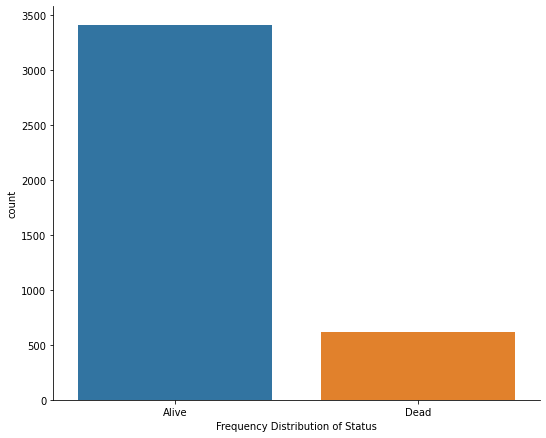

In [15]:
#Visualize all other categorical data using count plots

for cat in cat_data:
    g = sns.catplot(x=cat, kind='count', data=df, height=6, aspect=1.25)
    g.set_axis_labels(f'Frequency Distribution of {cat}')
    plt.show()

## Bivariate Analysis:

### _Data Scatter Matrix_ / _Pairplot_

Investigaet the relationships of the continuos data with each other

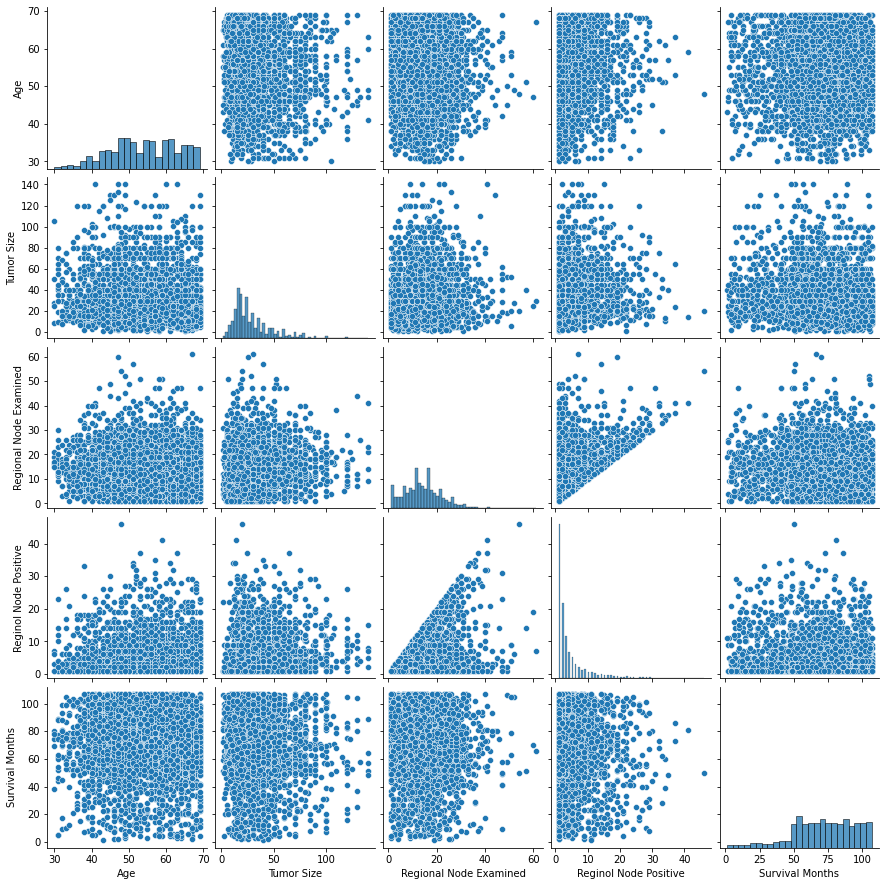

In [16]:
#scatter= scatter_matrix(df, figsize=(18,18)) #Have a general view of the distribution of the data
sns.pairplot(df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']])
plt.show()

 #### Explore the features against the cancer survival status to see how survival relates with the features:
-------------------------------------------------------------------------------------------------------------------

###   _Bar Plots_

- Race:

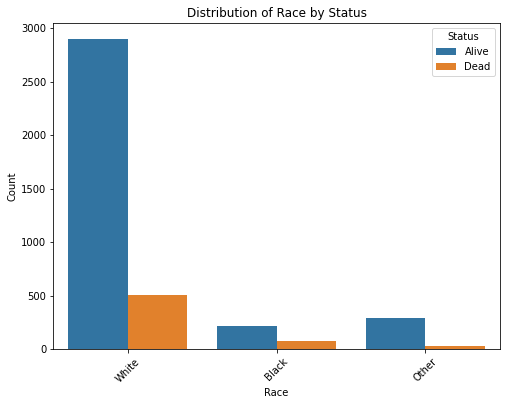

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Race', hue='Status')
plt.title('Distribution of Race by Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Alive', 'Dead'])

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

The dataset has a disproportionately high sample of white people in the study than any other race.
From the plot we see that, there is generally more people who survive than not. However, the ratios of survival to race is likely to be different among the races.

- **Scatter Plot:** Exploring race, age and the chances of survival through a Facet Grid Plot:

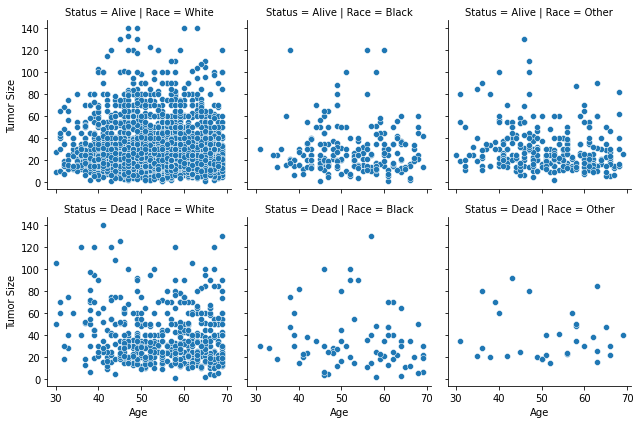

In [18]:
g = sns.FacetGrid(df, col='Race', row='Status')
g.map(sns.scatterplot, 'Age', 'Tumor Size')
plt.show()


Note: For all races, lower tumor sizes are in higher density than larger tumors (>60mm). In the white race, people die of cancer largely above the ages of 40, while in the black and other races, death seems to occur relatively evenly across the respective ages. The small sample size of these groups may be the reason to this conclusion. Sampling larger data for other races, may reveal a different pattern.


- Cancer Stage:

The T Stage, describes the size of the cancerous cells and the extent of the tumor. There are four stages in tumor advancemnet.
The following plot shows the distribution of survival for patients in different stages of breast cancer:


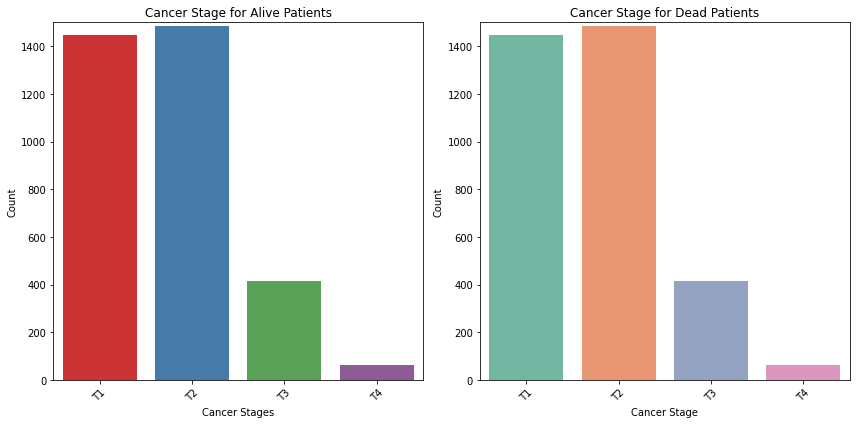

In [19]:
# Filter for "Alive" and "Dead" status
alive_df = df[df['Status'] == 'Alive']
dead_df = df[df['Status'] == 'Dead']

# Create a bar chart for T Stage for Alive status
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for "Alive"

sns.countplot(data=alive_df, x='T Stage', palette='Set1')
plt.title('Cancer Stage for Alive Patients')
plt.xlabel('Cancer Stages')
plt.ylabel('Count')
plt.ylim(0, 1500)  # Set y-axis limits
plt.xticks(rotation=45)
plt.xticks(rotation=45)

# Create a bar chart for T Stage for Dead status
plt.subplot(1, 2, 2)  # Create a subplot for "Dead"

sns.countplot(data=alive_df, x='T Stage', palette='Set2')
plt.title('Cancer Stage for Dead Patients')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.ylim(0, 1500) 
plt.xticks(rotation=45)
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

###    _Boxplots:_

- Age:

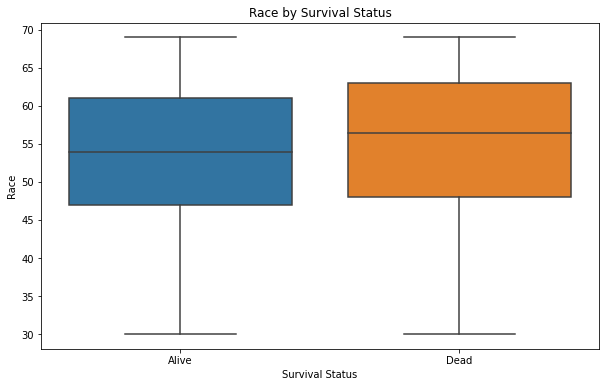

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Race')
plt.title('Race by Survival Status')
plt.show()

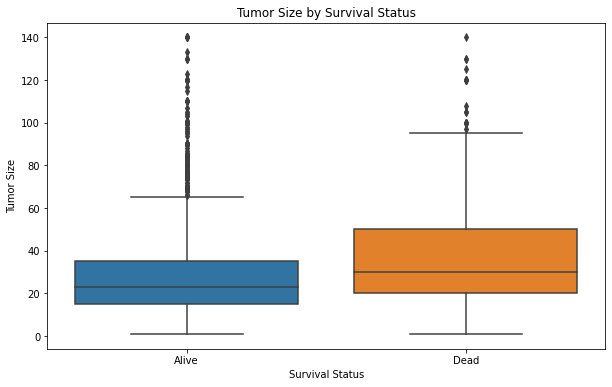

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Tumor Size', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Tumor Size')
plt.title('Tumor Size by Survival Status')
plt.show()

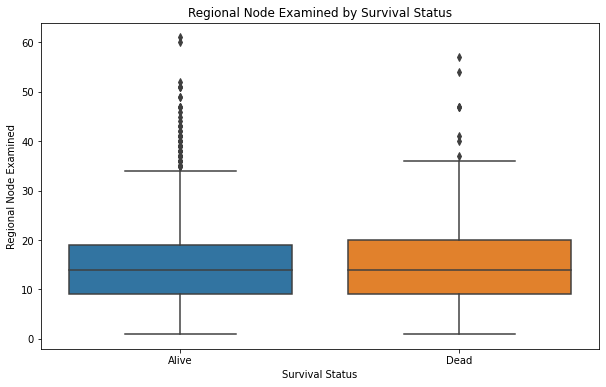

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Regional Node Examined', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Regional Node Examined')
plt.title('Regional Node Examined by Survival Status')
plt.show()

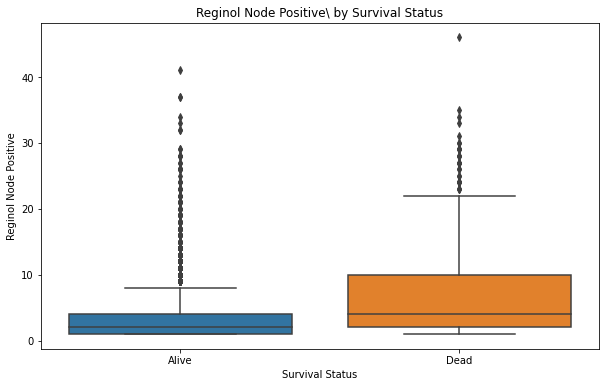

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Reginol Node Positive', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Reginol Node Positive')
plt.title('Reginol Node Positive\ by Survival Status')
plt.show()

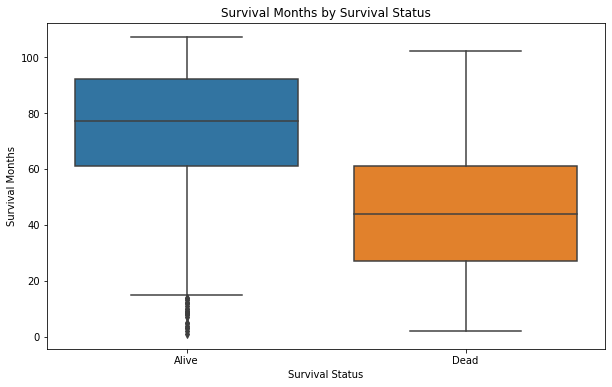

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Survival Months', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Survival Months')
plt.title('Survival Months by Survival Status')
plt.show()

## Correlation Analysis

In [25]:
df1=df.iloc[:, :-1]
correlation_matrix=df1.corr()
correlation_matrix
#Displays the correlation between continuous data

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.077215,-0.033345,0.012586,-0.009390
Tumor Size,-0.077215,1.000000,0.104352,0.242322,-0.086901
Regional Node Examined,-0.033345,0.104352,1.000000,0.411580,-0.022054
Reginol Node Positive,0.012586,0.242322,0.411580,1.000000,-0.135214
Survival Months,-0.009390,-0.086901,-0.022054,-0.135214,1.000000


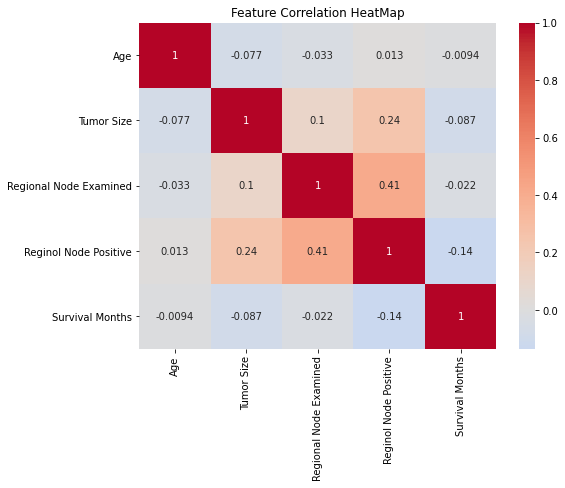

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation HeatMap')
plt.show()

- Encode the categorical data and re-plot the correlation matrix:

In [27]:
categorical_columns = [
    'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
    'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 
    'Progesterone Status', 'Status']


In [28]:
# Perform one-hot encoding on the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)


In [29]:
# Drop the original categorical columns from df
d2 = df.drop(['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'], axis=1, inplace=True)

# Concatenate the original DataFrame df and the one-hot encoded
df_2 = pd.concat([d2, df_encoded], axis=1)

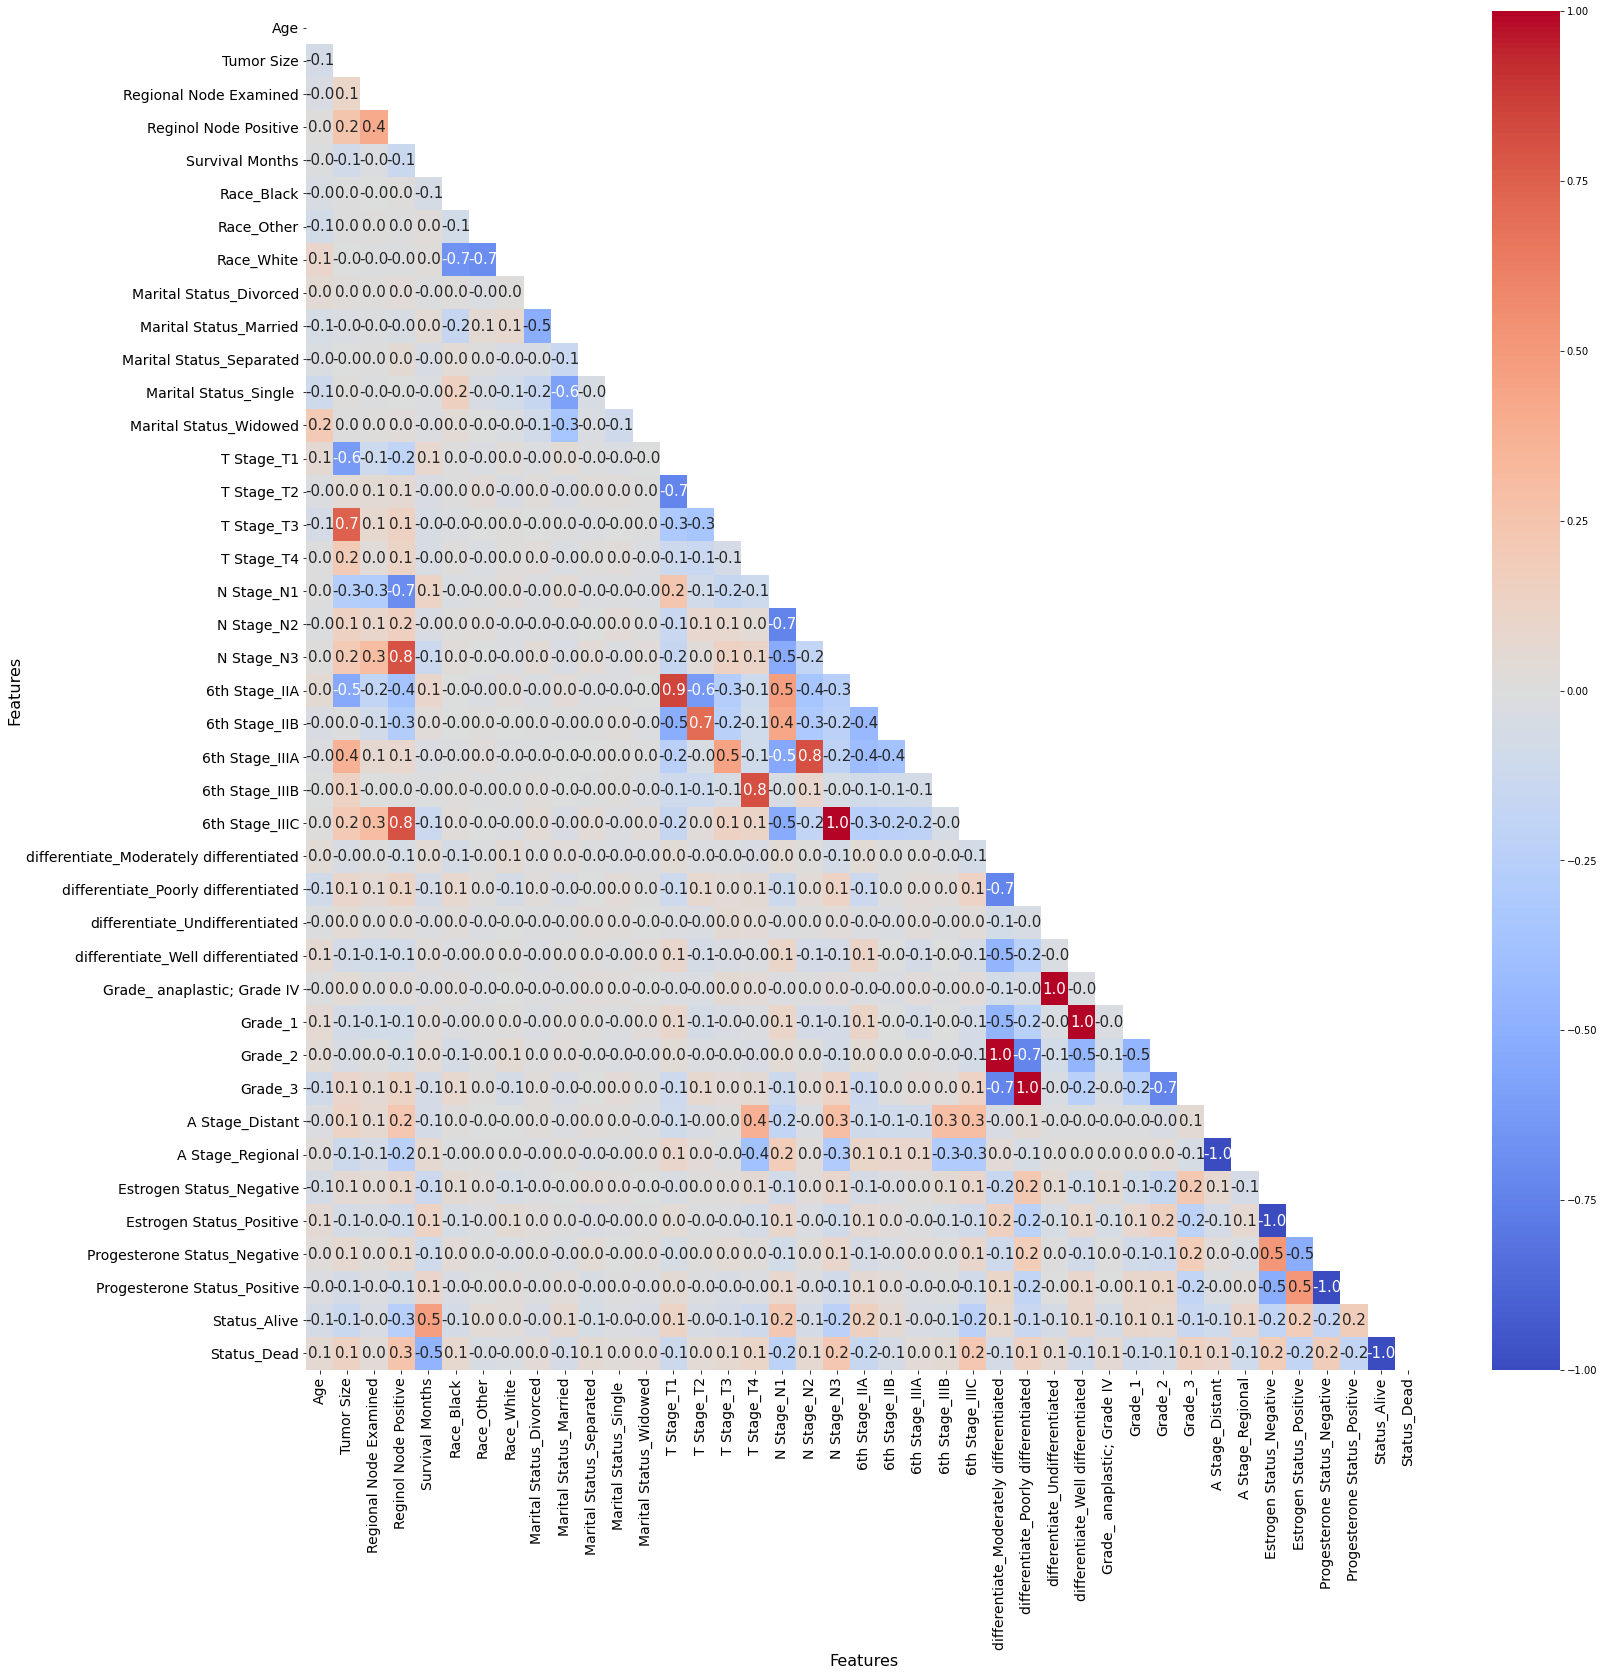

In [30]:
# Plot the new heat map that will include the features that have been encoded:
correlation_matrix = df_2.corr()


plt.figure(figsize=(25, 25))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".1f",  # Round off to 2 decimal places
            annot_kws={"size": 15},  # Increase Font size
            mask=mask,  # Only show the lower half
            )

# Increase font size for axis labels and ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)

plt.show()







There are a number of highly correlated features. This is found to be the different types of stages correlating highly with other types of stages. High fetaure correlation will introduce multicollinearity. These features may be grouped together.

In [31]:
df_encoded.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,...,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive,Status_Alive,Status_Dead
0,68,4,24,1,60,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
1,50,35,14,5,62,0,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
2,58,63,14,7,75,0,0,1,1,0,...,1,0,0,1,0,1,0,1,1,0
3,58,18,2,1,84,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
4,47,41,3,1,50,0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0


# 5. Data Preprocessing

## Missing values

In [32]:
#missing values
missings=df.isna()
missings.sum()

Age                       0
Tumor Size                0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

There are no missing values in the dataset.

### Assess Duplicates:

In [33]:
duplicates = df.duplicated()

# Show duplicate rows
print("Duplicate Rows:")
print(df[duplicates])

Duplicate Rows:
     Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
436   63          17                       9                      1   

     Survival Months  
436               56  


In [34]:
#Duplicates observed... To be removed:

df = df.drop_duplicates()

# 6. Feature Engineering 

# 7. Modelling

## Model Training

### Split Data into train-test sets

In [35]:
y = df_encoded['Status_Dead']  # Assuming you encoded 'dead' as 1

# Drop the target variable from the features

X = df_encoded.drop(columns=['Status_Dead', 'Status_Alive'])

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*Standardize the Features:*

Standardizing after the train-test split is good practise to avoid data leakage, or to ensure that the model gets unseen test data.

In [36]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
scaler= MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)
# Initialize and fit a Decision Tree Regressor


### Train the Model:

In [37]:
model= DecisionTreeRegressor(max_depth=5)
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [38]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Make Predictions:

In [39]:
y_pred= model.predict(X_test)

In [40]:
# Define the threshold (e.g., 0.5, but you can adjust it as needed)
threshold = 0.5

# Apply the threshold to convert continuous predictions to binary predictions
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]


# 8. Model Evaluation

## Model Metrics

In [41]:
#Calculate the accuracy, gini score and Area under the curve

roc_auc = roc_auc_score(y_test, y_pred_binary )

fpr, tpr, _ = roc_curve(y_test, y_pred_binary )

roc_auc_gini = (2 * roc_auc) - 1  # Calculate Gini coefficient

 
print(f"AUC: {roc_auc}")

print(f"Gini Coefficient: {roc_auc_gini}")




AUC: 0.7307177615571776
Gini Coefficient: 0.4614355231143552


In [42]:
# Calculate confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_binary )

print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[670  15]
 [ 62  58]]


In [43]:
accuracy = accuracy_score(y_test, y_pred_binary )

print(f"Accuracy: {accuracy}")
 

Accuracy: 0.9043478260869565


In [44]:
precision = precision_score(y_test, y_pred_binary )

print(f"Precision: {precision}")

Precision: 0.7945205479452054


In [45]:
recall = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall}")


Recall: 0.48333333333333334


In [46]:
f1 = f1_score(y_test, y_pred_binary)
print(f"F1 Score: {f1}")

F1 Score: 0.6010362694300518


In [47]:
# Generate a classification report
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.79      0.48      0.60       120

    accuracy                           0.90       805
   macro avg       0.85      0.73      0.77       805
weighted avg       0.90      0.90      0.89       805



## Visualize the decision tree

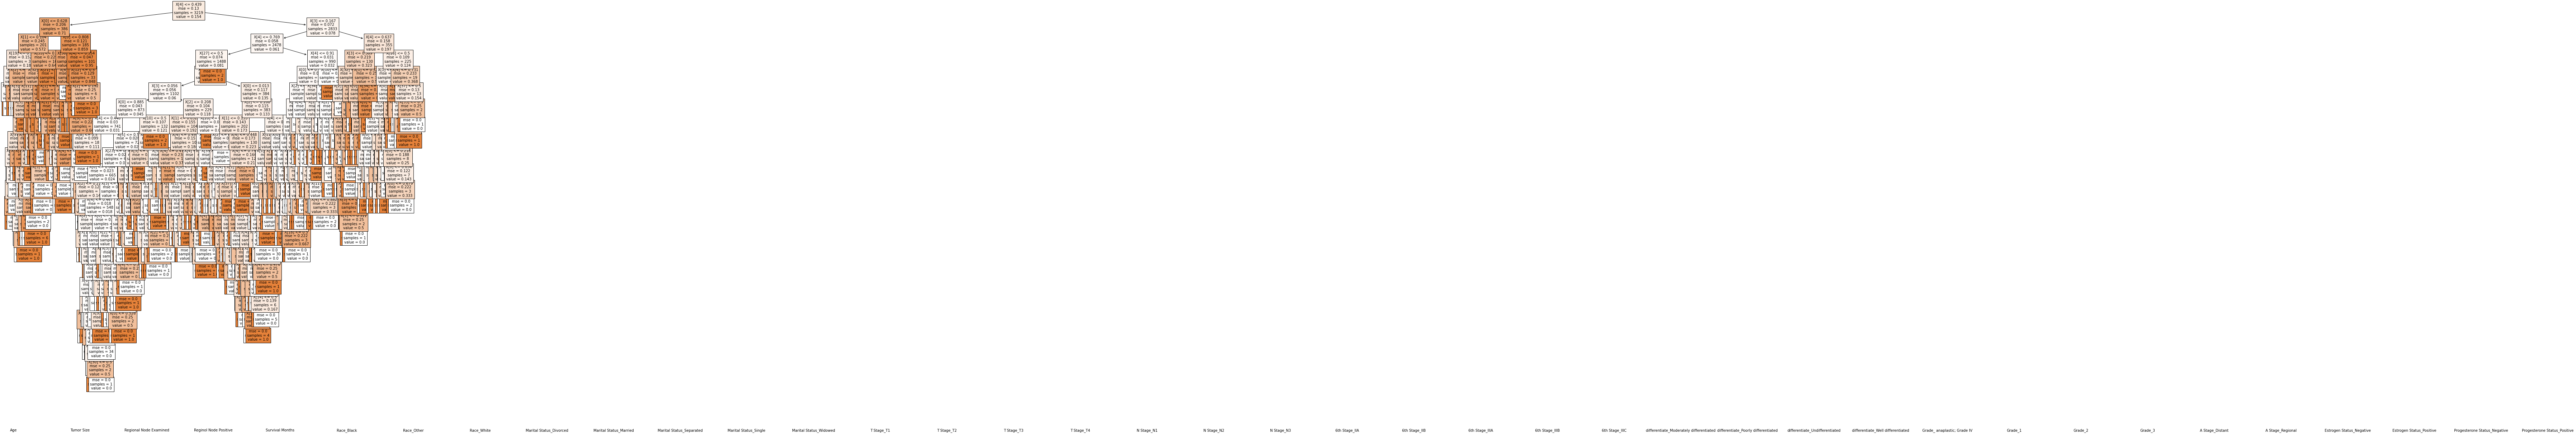

In [48]:
# Set up the figure and plot the Decision Tree

plt.figure(figsize=(20, 20))

plot_tree(regressor, filled=True, class_names=['0', '1'], fontsize=10)

 

# Manually add feature names as annotations to the nodes

for i, column in enumerate(X.columns):

    plt.text(

        x=i / 6,  # Adjust the x-position for proper placement

        y=-0.1,   # Adjust the y-position for proper placement

        s=column,

        fontsize=10,

        horizontalalignment='center',

    )

plt.show()

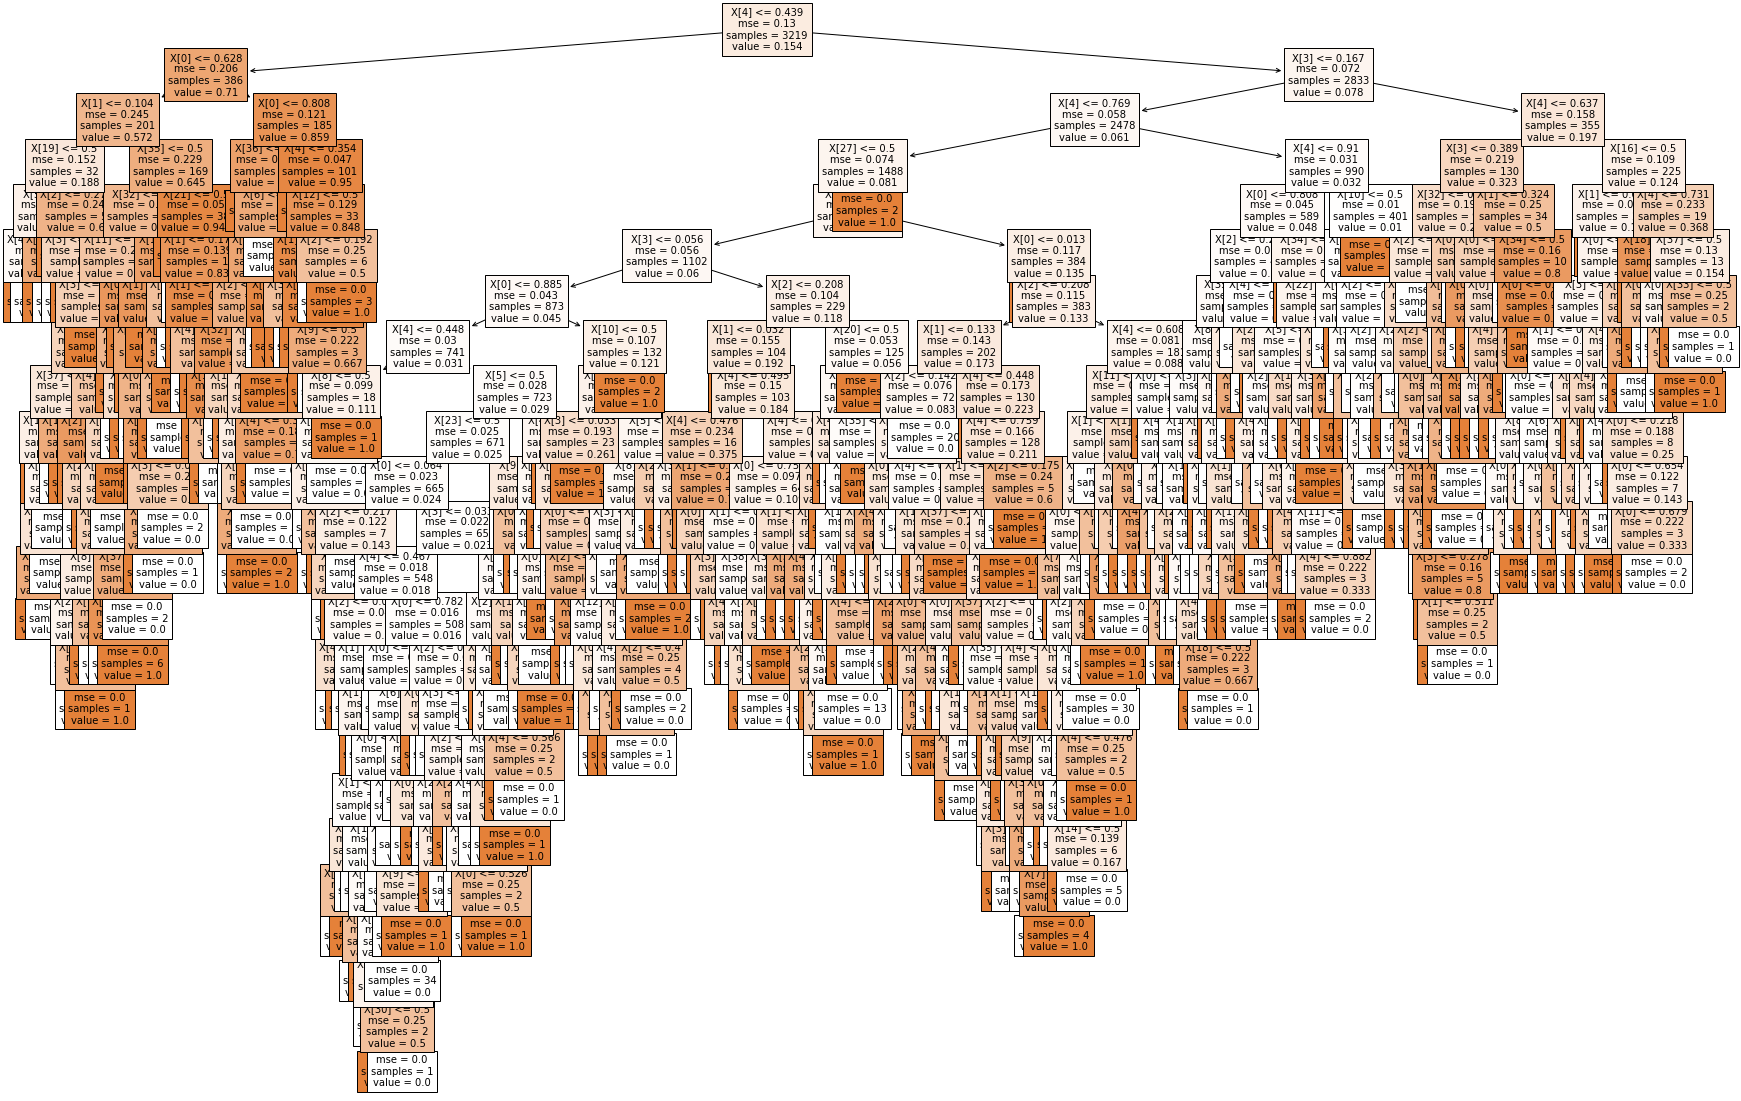

In [49]:
plt.figure(figsize=(30, 20))
plot_tree(regressor, filled=True, class_names=['0', '1'], fontsize=10)
plt.show()


In [50]:
#Pruning the tree

regressor = DecisionTreeClassifier(max_depth=4)
regressor.fit(X, y)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize and train the classifier with a max depth
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

# Create the plot
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0','1'], fontsize=14)
plt.show()


## Cross Validation

In [ ]:
#cross validation will help estimate how well the model will generalize to new unseen data

# Perform cross-validation
num_folds = 5  # Number of cross-validation folds
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=num_folds, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

## Confusion Matrix

In [ ]:
#Plot the confusion matrix
# Create a heatmap-style confusion matrix plot

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#the classification report:
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", class_report)

# 9. Hyperparameter Tuning

In [ ]:
# Define a grid of hyperparameters to search over

param_grid = {

    'max_depth': [None, 10, 20, 30],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4]

}
# Initialize GridSearchCV with the regressor and parameter grid

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data

grid_search.fit(X_train_scaled, y_train)
# Get the best hyperparameters from the grid search

best_params = grid_search.best_params_
# Get the best estimator (model) from the grid search

best_regressor = grid_search.best_estimator_
# Make predictions on the test data using the best model

y_pred_tuned = best_regressor.predict(X_test_scaled)


In [ ]:
# Evaluate the tunned model
# Calculate the AUC and ROC curve

roc_auc = roc_auc_score(y_test, y_pred_tuned)

fpr, tpr, _ = roc_curve(y_test, y_pred_tuned)

roc_auc_gini = (2 * roc_auc) - 1  # Calculate Gini coefficient

print(f"AUC: {roc_auc}")

print(f"Gini Coefficient: {roc_auc_gini}")



In [ ]:
# Generate a classification report

class_report = classification_report(y_test, y_pred_tuned)


# Print the classification report

print("Classification Report:\n", class_report)

# 10. Conclusion